In [595]:
import pandas as pd
import matplotlib as plt
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import json
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [596]:
pd.set_option('max_columns', 6)

In [597]:
ca_counties = gpd.read_file('CA_Counties/CA_Counties_TIGER2016.shp')
ca_counties.head()

STATEFP COUNTYFP  COUNTYNS  ...     INTPTLAT      INTPTLON  \
0      06      091  00277310  ...  +39.5769252  -120.5219926   
1      06      067  00277298  ...  +38.4500114  -121.3404409   
2      06      083  00277306  ...  +34.5370572  -120.0399729   
3      06      009  01675885  ...  +38.1838996  -120.5614415   
4      06      111  00277320  ...  +34.3587415  -119.1331432   

                                            geometry  
0  POLYGON ((-13431319.751 4821511.426, -13431312...  
1  POLYGON ((-13490651.476 4680831.603, -13490511...  
2  MULTIPOLYGON (((-13423116.772 4042044.149, -13...  
3  POLYGON ((-13428575.483 4627725.228, -13428534...  
4  MULTIPOLYGON (((-13317853.594 3931602.414, -13...  

[5 rows x 18 columns]

In [598]:
#ca_counties.plot(figsize=(15,15), edgecolor="green", facecolor="None");

In [599]:
world_map = gpd.read_file('Longitude_Graticules_and_World_Countries_Boundaries-shp/99bfd9e7-bb42-4728-87b5-07f8c8ac631c2020328-1-1vef4ev.lu5nk.shp')

In [600]:
world_map.head()

OBJECTID           CNTRY_NAME  \
0         1                Aruba   
1         2  Antigua and Barbuda   
2         3          Afghanistan   
3         4              Algeria   
4         5           Azerbaijan   

                                            geometry  
0  POLYGON ((-69.88223 12.41111, -69.94695 12.436...  
1  MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...  
2  POLYGON ((61.27656 35.60725, 61.29638 35.62853...  
3  POLYGON ((-5.15213 30.18047, -5.13917 30.19236...  
4  MULTIPOLYGON (((45.02583 41.03055, 45.00999 41...

In [601]:
world_map.crs

{'init': 'epsg:4326'}

In [602]:
world_map.head()

OBJECTID           CNTRY_NAME  \
0         1                Aruba   
1         2  Antigua and Barbuda   
2         3          Afghanistan   
3         4              Algeria   
4         5           Azerbaijan   

                                            geometry  
0  POLYGON ((-69.88223 12.41111, -69.94695 12.436...  
1  MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...  
2  POLYGON ((61.27656 35.60725, 61.29638 35.62853...  
3  POLYGON ((-5.15213 30.18047, -5.13917 30.19236...  
4  MULTIPOLYGON (((45.02583 41.03055, 45.00999 41...

In [603]:
world_map = world_map[(world_map.CNTRY_NAME != "Antarctica") & (world_map.CNTRY_NAME != "Fr. S. Antarctic Lands")]

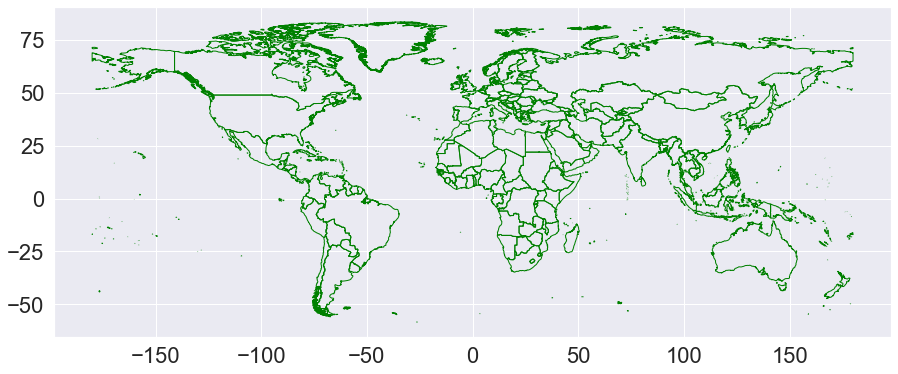

In [604]:
world_map.plot(figsize=(15,15), edgecolor="green", facecolor="None");

In [605]:
df = pd.read_csv('wine_master_dataset.csv', index_col=0)

In [606]:
df.head()

product_name  price                varietal  \
0           Dom Perignon Vintage with Gift Box    199  Vintage Sparkling Wine   
2      Duckhorn Napa Valley Cabernet Sauvignon     78      Cabernet Sauvignon   
3  Caymus Special Selection Cabernet Sauvignon    180      Cabernet Sauvignon   
4                                    Quintessa    199      Cabernet Sauvignon   
5                       Joseph Phelps Insignia    300     Bordeaux Red Blends   

   ...       appellation       region  year  
0  ...     ['Champagne']       France  2010  
2  ...   ['Napa Valley']   California  2017  
3  ...   ['Napa Valley']   California  2016  
4  ...  [' Napa Valley']   California  2016  
5  ...   ['Napa Valley']   California  2016  

[5 rows x 8 columns]

In [607]:
df_counts = df.region.value_counts().reset_index().rename( columns={'index': 'region', 'count': 'count'})
#df_counts.to_csv('df_counts.csv', index=False)

In [608]:
df2 = pd.read_csv('df_counts.csv')
df2.rename(columns={'region.1': 'count'}, inplace = True)
df2

region  count        country
0     California   8482  United States
1         France   6245         France
2          Italy   3436          Italy
3      Australia    832      Australia
4     Washington    803  United States
5          Spain    656          Spain
6         Oregon    393  United States
7      Argentina    311      Argentina
8        Germany    277        Germany
9    New Zealand    163    New Zealand
10         Chile    158          Chile
11      Portugal     86       Portugal
12       Austria     79        Austria
13  South Africa     40   South Africa
14        Greece     18         Greece
15    Other U.S.     16  United States

In [609]:
#df2 = df2[df2.region != 'Other U.S.']

In [610]:
agg = {'count': 'sum'}
df_new = df2.groupby(df2['country']).aggregate(agg)
df_new.reset_index()

country  count
0       Argentina    311
1       Australia    832
2         Austria     79
3           Chile    158
4          France   6245
5         Germany    277
6          Greece     18
7           Italy   3436
8     New Zealand    163
9        Portugal     86
10   South Africa     40
11          Spain    656
12  United States   9694

In [611]:
df_new.describe()

count
count    13.000000
mean   1691.923077
std    3012.875328
min      18.000000
25%      86.000000
50%     277.000000
75%     832.000000
max    9694.000000

In [612]:
# Merge datasets
merged = world_map.merge(df_new, left_on = 'CNTRY_NAME', right_on = 'country', how = 'left')

In [613]:
# impute 0 for country with no wines
#merged.fillna({'count': 0 }, inplace=True)

In [614]:
merged.crs

{'init': 'epsg:4326'}

In [615]:
merged.to_crs('epsg:3857')

/opt/miniconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


OBJECTID           CNTRY_NAME  \
0           1                Aruba   
1           2  Antigua and Barbuda   
2           3          Afghanistan   
3           4              Algeria   
4           5           Azerbaijan   
..        ...                  ...   
245       247        Western Samoa   
246       248            Swaziland   
247       249                Yemen   
248       250               Zambia   
249       251             Zimbabwe   

                                              geometry  count  
0    POLYGON ((-7779254.556 1392531.480, -7786458.3...    NaN  
1    MULTIPOLYGON (((-6872741.975 1983840.567, -687...    NaN  
2    POLYGON ((6821275.225 4246712.791, 6823482.132...    NaN  
3    POLYGON ((-573533.033 3526768.674, -572089.488...    NaN  
4    MULTIPOLYGON (((5012252.392 5016848.546, 50104...    NaN  
..                                                 ...    ...  
245  MULTIPOLYGON (((-19213354.112 -1517957.781, -1...    NaN  
246  POLYGON ((3439710.224 -3095008.663, 3437576.56...    NaN  
247  MULTIPOLYGON (((5419744.135 1578519.111, 54112...    NaN  
248  POLYGON ((3363297.613 -1687093.082, 3363982.14...    NaN  
249  POLYGON ((3616645.171 -2432998.054, 3614033.14...    NaN  

[250 rows x 4 columns]

##  World Map of Wine Regions 

In [618]:
#merged['count'] = merged['count'].astype(int)

In [619]:
merged.describe()

OBJECTID        count
count  250.000000    13.000000
mean   126.444000  1691.923077
std     72.405033  3012.875328
min      1.000000    18.000000
25%     64.250000    86.000000
50%    126.500000   277.000000
75%    188.750000   832.000000
max    251.000000  9694.000000

In [620]:
merged.crs

{'init': 'epsg:4326'}

In [621]:
# Import packages for building map
import json
from bokeh.io import show
from bokeh.models import (CDSView, ColorBar, ColumnDataSource, CustomJS,
                          CustomJSFilter, GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure

# Input GeoJSON source that contains features for plotting
geosource = GeoJSONDataSource(geojson = merged.to_json())

In [634]:
# Define color palettes
palette = brewer['BuPu'][4]
palette = palette[::-1] # reverse order of colors so higher values have darker colors

# Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 8000, nan_color='#ececec')

# Define custom tick labels for color bar.
#tick_labels = {'0': '0', '10': '10','2000':'2000', '3000': '3000', '4000':'4000', '6000': '6000','8000': '8000+'}

# Create color bar.
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal')
                     #major_label_overrides = tick_labels)

# Create figure object.
p = figure(title = 'Count of Wine Entries for Each Country in the Dataset ', plot_height = 600 ,
           plot_width = 950, toolbar_location = 'above',
           tools = 'pan, wheel_zoom, box_zoom, reset', 
           x_axis_type= 'mercator', y_axis_type= 'mercator')
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.axis.visible = False

# Add patch renderer to figure.
countries = p.patches('xs','ys', source = geosource,
                   fill_color = {'field' :'count', 'transform' : color_mapper},
                   line_color = 'gray', line_width = 0.25, fill_alpha = 10)

# Create hover tool
p.add_tools(HoverTool(renderers = [countries],
                      tooltips = [('country','@CNTRY_NAME'),('count', '@count')]))

# Specify layout
p.add_layout(color_bar, 'below')

show(p)